In [1]:
#this project utilizes the "history of baseball" datasets from Kaggle, a highly comprehensive dataset from Sean Lahman.
#https://www.kaggle.com/datasets/seanlahman/the-history-of-baseball

In [24]:
import zipfile
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.linear_model import LogisticRegressionCV

In [3]:
path = f'{os.getcwd()}\\history_of_baseball.zip'
with zipfile.ZipFile(path, 'r') as zips:
    for file in zips.namelist():
        print(file)

all_star.csv
appearances.csv
batting.csv
batting_postseason.csv
college.csv
database.sqlite
fielding.csv
fielding_outfield.csv
fielding_postseason.csv
hall_of_fame.csv
hashes.txt
home_game.csv
manager.csv
manager_award.csv
manager_award_vote.csv
manager_half.csv
park.csv
pitching.csv
pitching_postseason.csv
player.csv
player_award.csv
player_award_vote.csv
player_college.csv
postseason.csv
readme.txt
salary.csv
team.csv
team_franchise.csv
team_half.csv


In [4]:
#unzip necessary csvs from zipfile using this method
with zipfile.ZipFile(f'{os.getcwd()}\\history_of_baseball.zip','r') as zf:
    with zf.open('salary.csv') as f:
        salaries = pd.read_csv(f)

In [5]:
salaries

,year,team_id,league_id,player_id,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000
...,...,...,...,...,...
25570,2015,WAS,NL,treinbl01,512800
25571,2015,WAS,NL,ugglada01,507500
25572,2015,WAS,NL,werthja01,21000000
25573,2015,WAS,NL,zimmejo02,16500000


Text(0.5, 1.0, '2005 MLB Salaries')

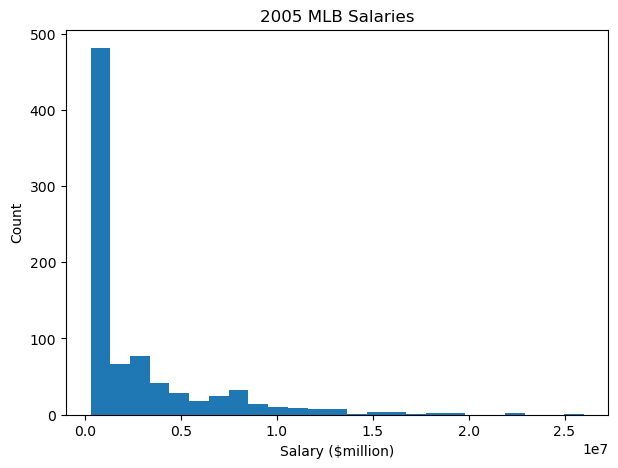

In [6]:
#will use data from 2002,2003,2004 to predict 2005 salaries (my birth year)
#although new contracts are not a yearly occurence, this is the best we can do to have an even match.
salaries_2005 = salaries[salaries['year'] == 2005]

fig, ax = plt.subplots(figsize = (7,5))

plt.hist(x = salaries_2005['salary'],
         bins = 25)

ax.set_xlabel('Salary ($million)')
ax.set_ylabel('Count')

plt.title('2005 MLB Salaries')

In [7]:
#get hitting data. will work with pitching later
with zipfile.ZipFile(f'{os.getcwd()}\\history_of_baseball.zip','r') as zf:
    with zf.open('batting.csv') as f:
        batting = pd.read_csv(f)

In [8]:
batting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101332 entries, 0 to 101331
Data columns (total 22 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   player_id  101332 non-null  object 
 1   year       101332 non-null  int64  
 2   stint      101332 non-null  int64  
 3   team_id    101332 non-null  object 
 4   league_id  100595 non-null  object 
 5   g          101332 non-null  int64  
 6   ab         96183 non-null   float64
 7   r          96183 non-null   float64
 8   h          96183 non-null   float64
 9   double     96183 non-null   float64
 10  triple     96183 non-null   float64
 11  hr         96183 non-null   float64
 12  rbi        95759 non-null   float64
 13  sb         94883 non-null   float64
 14  cs         72729 non-null   float64
 15  bb         96183 non-null   float64
 16  so         88345 non-null   float64
 17  ibb        59620 non-null   float64
 18  hbp        93373 non-null   float64
 19  sh         89845 non-nu

In [12]:
#since there are no averages present in the columns, we can easily aggregate the data for a 3 year time period
batting_years = batting[batting['year'].isin([2002,2003,2004])]
batting_aggregate = batting_years.groupby('player_id', as_index = False).sum().drop(columns = 'year')

In [26]:
#produce new columns for averages now
h = batting_aggregate['h']
ab = batting_aggregate['ab']
bb = batting_aggregate['bb']
hbp = batting_aggregate['hbp']
sf = batting_aggregate['sf']
double = batting_aggregate['double']
triple = batting_aggregate['triple']
hr = batting_aggregate['hr']
batting_aggregate['avg'] = h/ab
batting_aggregate['obp'] = (h+bb+hbp)/(ab+bb+hbp+sf)
batting_aggregate['slg'] = (h + double + 2*triple + 3*hr)/ab
batting_aggregate['ops'] = batting_aggregate['obp'] + batting_aggregate['slg']
batting_aggregate['tb'] = (h + double + 2*triple + 3*hr).astype(int)

In [28]:
batting_aggregate.columns

Index(['player_id', 'stint', 'team_id', 'league_id', 'g', 'ab', 'r', 'h',
       'double', 'triple', 'hr', 'rbi', 'sb', 'cs', 'bb', 'so', 'ibb', 'hbp',
       'sh', 'sf', 'g_idp', 'avg', 'obp', 'slg', 'ops', 'tb'],
      dtype='object')

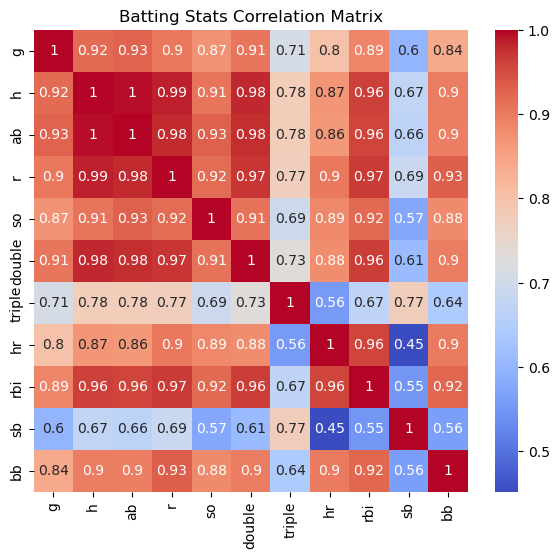

In [42]:
plt.figure(figsize = (7,6))
correlation_matrix = batting_aggregate[['g','h','ab','r','so','double','triple','hr','rbi','sb','bb']].corr()
sns.heatmap(correlation_matrix,cmap = 'coolwarm',annot=True)
plt.title('Batting Stats Correlation Matrix')
plt.show()